# 💳 Credit Card Fraud Detection – Complete EDA with Full Explanations


## 🧠 What is EDA?

**Exploratory Data Analysis (EDA)** is the process of investigating and visualizing a dataset to:

- Understand its structure
- Identify patterns and relationships
- Detect anomalies and missing values
- Gain insights before applying machine learning models

Here, we perform EDA on a credit card transaction dataset to explore how fraud can be detected based on transaction patterns.


## 🔹 Step 1: Importing Necessary Libraries


We start by importing the libraries needed for data loading, manipulation, and visualization:

- `pandas` is used for working with structured data.
- `numpy` provides mathematical functions.
- `seaborn` and `matplotlib` are used for creating plots.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## 🔹 Step 2: Loading the Dataset


We load the dataset using `pd.read_csv()`.

> The dataset contains anonymized features (`V1` to `V28`), along with `Time`, `Amount`, and the target variable `Class` (0 = legit, 1 = fraud).


In [2]:

df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 🔹 Step 3: Dataset Shape and Structure


We check how many rows and columns are in the dataset using `.shape`.

Then, `.info()` shows:
- Column names
- Data types
- Non-null counts

This gives us an overview of the dataset.


In [3]:

print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 no

## 🔹 Step 4: Checking for Missing Values


Missing data can cause issues in analysis and modeling.  
We use `.isnull().sum()` to count missing values in each column.


In [4]:

df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 🔹 Step 5: Target Variable Distribution (`Class`)


The target variable `Class` tells us if a transaction is fraud (`1`) or not (`0`).

We use `.value_counts()` to see how imbalanced the dataset is, and a bar plot to visualize it.


In [5]:

df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

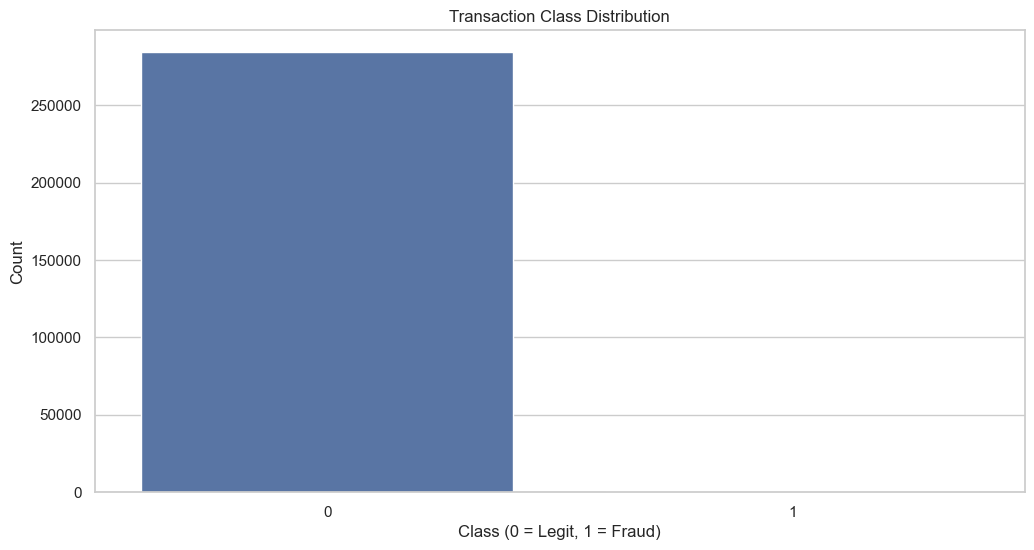

In [6]:

sns.countplot(x='Class', data=df)
plt.title("Transaction Class Distribution")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


## 🔹 Step 6: Descriptive Statistics


We use `.describe()` to get basic statistics for each column:  
- Mean
- Min/Max
- Standard deviation

This helps spot unusual ranges or outliers.


In [7]:

df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 🔹 Step 7: Correlation Matrix


Correlation shows how closely two variables move together.

We use `.corr()` to calculate correlations, and a heatmap to visualize relationships between variables — especially between features and `Class`.


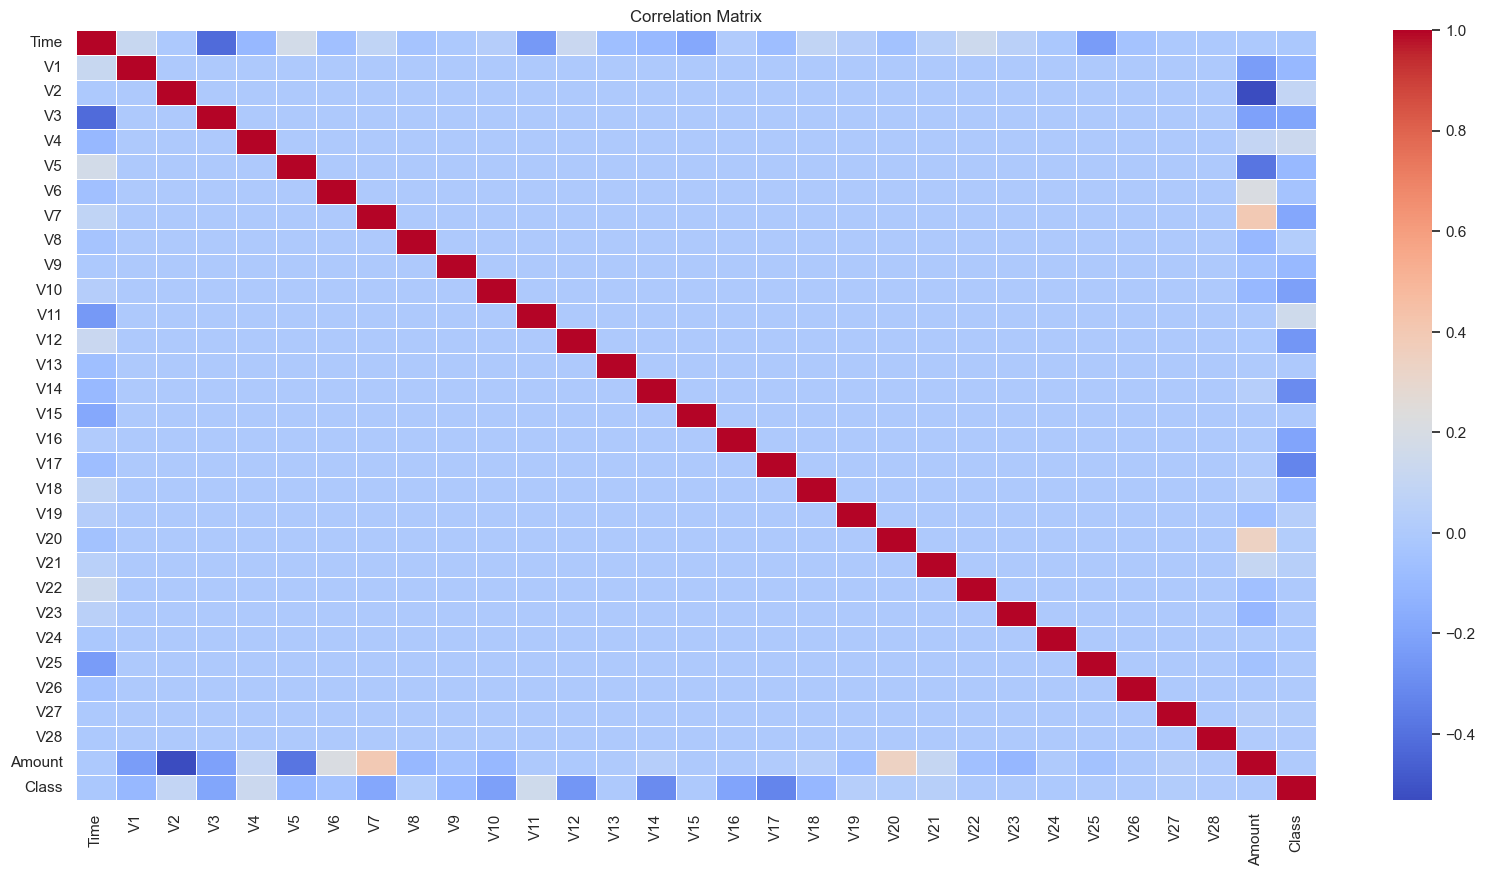

In [8]:

corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## 🔹 Step 8: Boxplot of Feature `V1` by Class


Boxplots help visualize the **distribution** of a feature for each class (fraud vs legit).  
This helps us see if a feature like `V1` behaves differently for fraud cases.


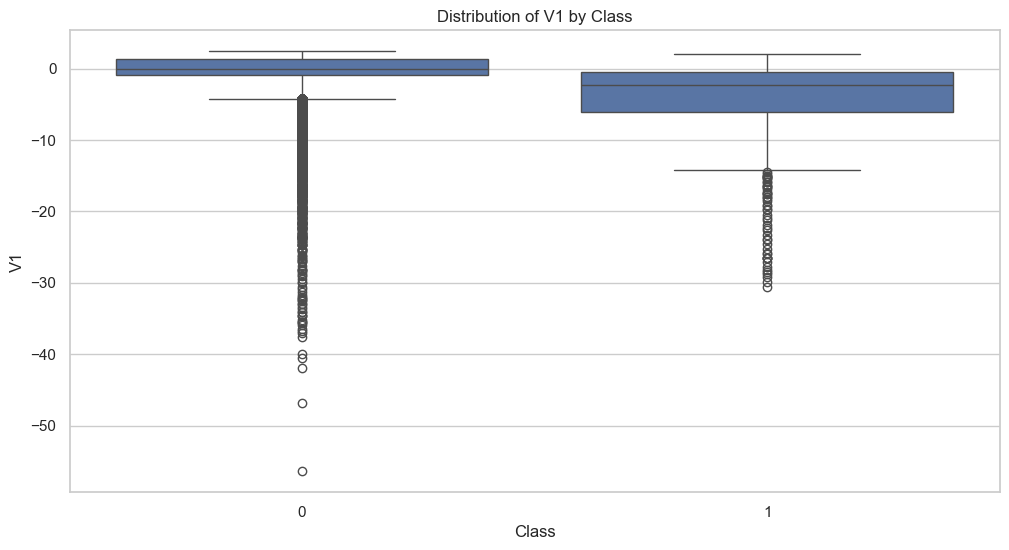

In [9]:

sns.boxplot(x='Class', y='V1', data=df)
plt.title("Distribution of V1 by Class")
plt.show()


## 🔹 Step 9: Distribution of Transaction Amounts


We use a histogram to see how transaction `Amount` values are distributed.

This tells us if frauds tend to occur at lower or higher amounts.


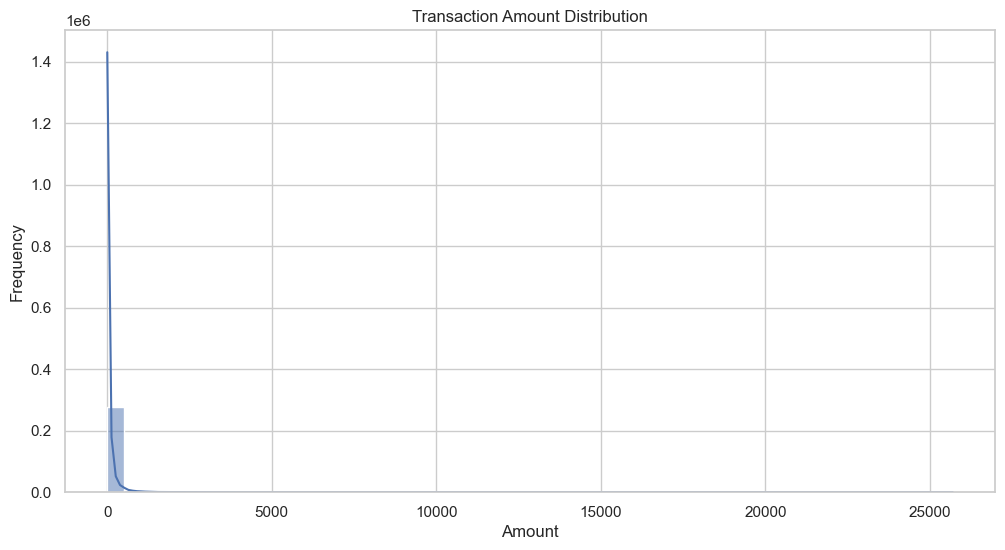

In [10]:

sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


## 🔹 Step 10: Distribution of Transaction Time


The `Time` column represents seconds since the first transaction.

Plotting it helps check if frauds are more common at specific times.


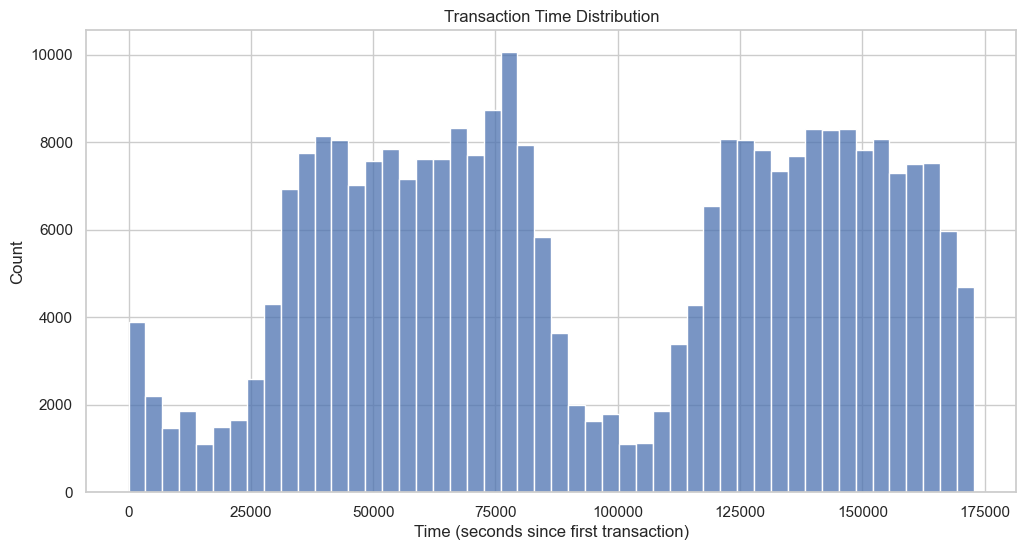

In [11]:

sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Count")
plt.show()


## ✅ Conclusion


This notebook explored:
- The structure of the dataset
- Severe class imbalance (fraud is < 1%)
- Important feature behaviors like `V1`, `Amount`, and `Time`
- Correlation patterns across all variables

This analysis prepares us for building effective fraud detection models.

📌 Next Step: Try models like Logistic Regression or XGBoost with SMOTE/undersampling.
